In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [4]:
# Train Data (subset of all interactions)
df = pd.read_csv('../data/interactions_train_df.csv')
df = df[['user_id', 'content_id', 'game', 'view']]
df.head(5)

,user_id,content_id,game,view
0,134,1680,Far Cry 3 Blood Dragon,1
1,2219,1938,Gone Home,1
2,3315,3711,Serious Sam 3 BFE,1
3,3440,4784,Velvet Sundown,1
4,870,4104,Super Hexagon,1


In [6]:
# Content Data of Games
df_game = pd.read_csv('../data/articles_df.csv')
df_game.head(4)

,content_id,game,total_users,total_hours
0,0,007 Legends,1,1.7
1,1,0RBITALIS,3,4.2
2,2,1... 2... 3... KICK IT! (Drop That Beat Like a...,7,27.0
3,3,10 Second Ninja,6,11.9


### Create a Matrix of Interactions

In [7]:
# Creating a sparse pivot table with users in rows and items in columns
users_items_matrix_df = df.pivot(index   = 'user_id', 
                                 columns = 'content_id', 
                                 values  = 'view').fillna(0)
users_items_matrix_df.head(10)

content_id,0,1,2,3,5,6,7,8,9,10,...,5103,5104,5105,5106,5107,5108,5109,5110,5111,5112
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
users_items_matrix_df.shape

(3757, 4862)

In [6]:
users_items_matrix_df.values.mean()*100

0.5042609616033342

## Model

In [10]:
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout
from keras.models import Model

def autoEncoder(X):
    '''
    Autoencoder for Collaborative Filter Model
    '''

    # Input
    input_layer = Input(shape=(X.shape[1],), name='UserScore')
    
    # Encoder
    # -----------------------------
    enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)

    # Latent Space
    # -----------------------------
    lat_space = Dense(256, activation='selu', name='LatentSpace')(enc)
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

    # Decoder
    # -----------------------------
    dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(X.shape[1], activation='linear', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    model = Model(input_layer, output_layer)    
    
    return model

In [8]:
# input
X = users_items_matrix_df.values
y = users_items_matrix_df.values

In [12]:
# Build model
model = autoEncoder(X)

#model.compile(optimizer = Adam(lr=0.0001), loss='mse')
model.compile(optimizer = 'Adam', loss='mse')
    
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ UserScore (InputLayer)          │ (None, 4862)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ EncLayer1 (Dense)               │ (None, 512)            │     2,489,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LatentSpace (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DecLayer1 (Dense)               │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ UserScorePred (Dense)           │ (None, 4862)           │     2,494,206 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,246,974 (20.02 MB)

 Trainable params: 5,246,974 (20.02 MB)

 Non-trainable params: 0 (0.00 B)

### Train Model

In [13]:
hist = model.fit(x=X, y=y,
                  epochs=50,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0219 - val_loss: 0.0021
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0073 - val_loss: 0.0019
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0065 - val_loss: 0.0019
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0071 - val_loss: 0.0019
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0068 - val_loss: 0.0019
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0073 - val_loss: 0.0021
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0096 - val_loss: 0.0019
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0077 - val_loss: 0.0019
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0070 - val_loss: 0.0019
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0065 - val_loss: 0.0018
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0057 - val_loss: 0.0018
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0

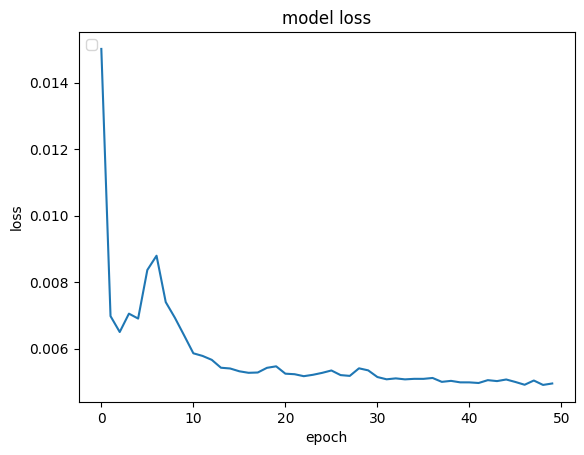

In [14]:
def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.plot(hist.history['loss'])
    #plt.plot(hist.history['val_loss'])

plot_hist(hist)

## Recommender

In [15]:
# Predict new Matrix Interactions, set score zero on visualized games
new_matrix = model.predict(X) * (X == 0)

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [16]:
# converting the reconstructed matrix back to a Pandas dataframe
new_users_items_matrix_df  = pd.DataFrame(new_matrix, 
                                          columns = users_items_matrix_df.columns, 
                                          index   = users_items_matrix_df.index)
new_users_items_matrix_df.head()

content_id,0,1,2,3,5,6,7,8,9,10,...,5103,5104,5105,5106,5107,5108,5109,5110,5111,5112
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.001298,0.008048,-0.004975,0.032975,-0.000111,-0.011317,-0.013974,-0.013558,-0.005357,-0.005309,...,0.002483,0.002323,-0.001146,0.007205,0.001748,-0.023689,0.000565,-0.001526,-0.027458,0.006466
1,-0.003877,0.001430,0.005921,0.018869,0.008341,-0.022251,-0.013377,-0.005621,-0.015148,0.008688,...,0.003644,0.011976,0.003174,0.005818,0.001039,0.006634,0.001169,0.015806,0.031665,0.013301
2,-0.001089,0.002896,0.009893,0.048557,-0.003442,0.018117,-0.016730,0.002761,-0.007889,0.011989,...,0.002124,-0.006477,-0.001057,0.033213,0.004920,0.011685,-0.000499,-0.000483,0.015553,-0.001265
3,0.000079,0.002564,-0.004491,0.011237,0.003589,0.004043,0.000297,0.014009,0.010734,-0.003354,...,0.002230,0.003648,0.000144,0.011904,0.001719,-0.016783,-0.001417,0.011268,-0.003626,0.005748
4,0.001024,0.000647,-0.009030,0.010544,0.001047,-0.003279,-0.004791,0.007453,0.002476,0.004519,...,0.002339,0.004765,0.000631,0.008039,0.002340,-0.015559,-0.000854,0.014301,0.008727,0.004591


In [17]:
print(new_users_items_matrix_df.values.min(), new_users_items_matrix_df.values.max())

-1.0171129 1.6269251


In [18]:
def recommender_for_user(user_id, interact_matrix, df_content, topn = 10):
    '''
    Recommender Games for UserWarning
    '''
    pred_scores = interact_matrix.loc[user_id].values

    df_scores   = pd.DataFrame({'content_id': list(users_items_matrix_df.columns), 
                               'score': pred_scores})

    df_rec      = df_scores.set_index('content_id')\
                    .join(df_content.set_index('content_id'))\
                    .sort_values('score', ascending=False)\
                    .head(topn)[['score', 'game']]
    
    return df_rec[df_rec.score > 0]

Recommender for **user_id = 1011**. This user prefers games in the same half-life line

In [20]:
# Games previously purchased by the user
recommender_for_user(
    user_id         = 1011, 
    interact_matrix = users_items_matrix_df, 
    df_content      = df_game)

,score,game
content_id,,
3196,1.0,Portal
4221,1.0,Team Fortress 2
2055,1.0,Half-Life 2
2057,1.0,Half-Life 2 Episode One
2059,1.0,Half-Life 2 Lost Coast


In [21]:
# Recommended User Games
recommender_for_user(
    user_id         = 1011, 
    interact_matrix = new_users_items_matrix_df, 
    df_content      = df_game)

,score,game
content_id,,
2056,0.247148,Half-Life 2 Deathmatch
2058,0.242614,Half-Life 2 Episode Two
978,0.201011,Counter-Strike Source
2457,0.181792,Left 4 Dead 2
3197,0.167141,Portal 2
2062,0.151396,Half-Life Deathmatch Source
4750,0.140323,Unturned
2061,0.120325,Half-Life Blue Shift
4222,0.109016,Team Fortress Classic


Recommender for **user_id = 1319**. This user prefers games in the same line as the RPG or strategy

In [22]:
# Games previously purchased by the user
recommender_for_user(
    user_id         = 134, 
    interact_matrix = users_items_matrix_df, 
    df_content      = df_game)

,score,game
content_id,,
4479,1.0,The Walking Dead
3196,1.0,Portal
2058,1.0,Half-Life 2 Episode Two
2057,1.0,Half-Life 2 Episode One
2056,1.0,Half-Life 2 Deathmatch
2055,1.0,Half-Life 2
4546,1.0,Titan Quest
3184,1.0,Poker Night 2
3203,1.0,Post Apocalyptic Mayhem


In [22]:
# Recommended User Games
recommender_for_user(
    user_id         = 1319, 
    interact_matrix = new_users_items_matrix_df, 
    df_content      = df_game)

,score,game
content_id,,
4330,0.292329,The Elder Scrolls V Skyrim - Dragonborn
3792,0.151435,Sid Meier's Civilization V
3837,0.146657,Skyrim High Resolution Texture Pack
4630,0.108521,Total War ROME II - Emperor Edition
1490,0.105798,Empire Total War
1667,0.093142,Fallout New Vegas
2872,0.091419,Napoleon Total War
3793,0.083783,Sid Meier's Civilization V Brave New World
1668,0.077532,Fallout New Vegas Courier's Stash
